# Facial Feature Detection with OpenFace

This notebook uses an open source project [OpenFace](https://github.com/TadasBaltrusaitis/OpenFace) by Tadas Baltrusaitis to detect and track multi-person head motions and facial muscle movements on a given Youtube video. This notebook was inspired by [DL-CoLab-Notebooks](https://github.com/tugstugi/dl-colab-notebooks).

## Install OpenFace
The first code snippet installs all the necessary dependencies and may take a while (30~40 minutes). Go make yourself a cup of coffee and watch some Youtube videos to find the clips you'd like to extract facial features from while your environment sets up.


In [3]:
import os
from os.path import exists, join, basename, splitext

################# Need to revert back to CUDA 10.0 ##################
# Thanks to http://aconcaguasci.blogspot.com/2019/12/setting-up-cuda-100-for-mxnet-on-google.html
#Uninstall the current CUDA version
!apt-get --purge remove cuda nvidia* libnvidia-*
!dpkg -l | grep cuda- | awk '{print $2}' | xargs -n1 dpkg --purge
!apt-get remove cuda-*
!apt autoremove
!apt-get update

#Download CUDA 10.0
!wget  --no-clobber https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64/cuda-repo-ubuntu1804_10.0.130-1_amd64.deb
#install CUDA kit dpkg
!dpkg -i cuda-repo-ubuntu1804_10.0.130-1_amd64.deb
!sudo apt-key adv --fetch-keys https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64/7fa2af80.pub
!apt-get update
!apt-get install cuda-10-0
#Slove libcurand.so.10 error
!wget --no-clobber http://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64/nvidia-machine-learning-repo-ubuntu1804_1.0.0-1_amd64.deb
#-nc, --no-clobber: skip downloads that would download to existing files.
!apt install ./nvidia-machine-learning-repo-ubuntu1804_1.0.0-1_amd64.deb
!apt-get update
####################################################################

git_repo_url = 'https://github.com/TadasBaltrusaitis/OpenFace.git'
project_name = splitext(basename(git_repo_url))[0]
# clone openface
!git clone -q --depth 1 $git_repo_url

# install new CMake becaue of CUDA10
!wget -q https://cmake.org/files/v3.13/cmake-3.13.0-Linux-x86_64.tar.gz
!tar xfz cmake-3.13.0-Linux-x86_64.tar.gz --strip-components=1 -C /usr/local

# Get newest GCC
!sudo apt-get update
!sudo apt-get install build-essential 
!sudo apt-get install g++-8

# install python dependencies
!pip install -q youtube-dl

# Finally, actually install OpenFace
!cd OpenFace && bash ./download_models.sh && sudo bash ./install.sh

Streaming output truncated to the last 5000 lines.
  inflating: opencv-4.1.0/samples/dnn/object_detection.cpp  
  inflating: opencv-4.1.0/samples/dnn/object_detection.py  
  inflating: opencv-4.1.0/samples/dnn/openpose.cpp  
  inflating: opencv-4.1.0/samples/dnn/openpose.py  
  inflating: opencv-4.1.0/samples/dnn/segmentation.cpp  
  inflating: opencv-4.1.0/samples/dnn/segmentation.py  
  inflating: opencv-4.1.0/samples/dnn/shrink_tf_graph_weights.py  
  inflating: opencv-4.1.0/samples/dnn/text_detection.cpp  
  inflating: opencv-4.1.0/samples/dnn/text_detection.py  
  inflating: opencv-4.1.0/samples/dnn/tf_text_graph_common.py  
  inflating: opencv-4.1.0/samples/dnn/tf_text_graph_faster_rcnn.py  
  inflating: opencv-4.1.0/samples/dnn/tf_text_graph_mask_rcnn.py  
  inflating: opencv-4.1.0/samples/dnn/tf_text_graph_ssd.py  
   creating: opencv-4.1.0/samples/gpu/
  inflating: opencv-4.1.0/samples/gpu/CMakeLists.txt  
  inflating: opencv-4.1.0/samples/gpu/alpha_comp.cpp  
  inflating: ope

## Detect facial expressions on a test video

We are going to detect facial features on the following Youtube video:

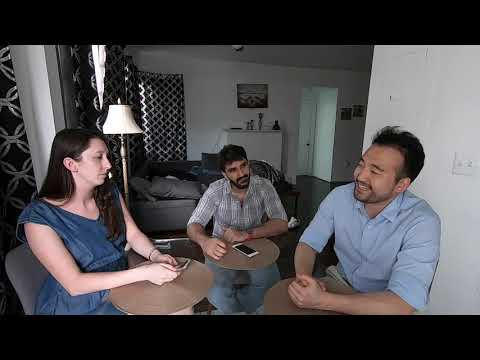

In [ ]:
from IPython.display import YouTubeVideo

# Change the Youtube_ID with the link to your group's video.
YOUTUBE_ID = 'XtA6FQz8BHQ'

YouTubeVideo(YOUTUBE_ID)

Download the above youtube video, cut the first 10 seconds and do the face detection & feature extraction on that clip. This takes about a minute or two. Instead of `FaceLandmarkVidMulti` you may also use `FeatureExtraction` to extract features of a single face or `FaceLandmarkImg` to extract features on a face image. See full description of the arguments [here](https://github.com/TadasBaltrusaitis/OpenFace/wiki/Command-line-arguments). 

In [4]:
#!rm -rf youtube.mp4
# download the youtube with the given ID
#!youtube-dl -f 'bestvideo[ext=mp4]' --output "youtube.%(ext)s" https://www.youtube.com/watch?v=$YOUTUBE_ID
# cut the first 5 seconds
#!ffmpeg -y -loglevel info -i youtube.mp4 -t 10 video.mp4
# clear any previous outputs.
!rm -rf processed
# detect poses on the these 10 seconds.
#!./OpenFace/build/bin/FaceLandmarkVidMulti -f video.mp4 -out_dir processed
# convert the result into MP4
#!ffmpeg -y -loglevel info -i processed/video.avi output.mp4
import pandas as pd
from google.colab import drive
import os
from os.path import exists, join, basename, splitext
drive.mount('/content/gdrive', force_remount=True)
#!./OpenFace/build/bin/FaceLandmarkImg -fdir "gdrive/My Drive/AI-Emotion-Project/sad" -out_dir processed
!./OpenFace/build/bin/FaceLandmarkImg -fdir "gdrive/My Drive/AI-Emotion-Project/not-sad" -out_dir processed
#!./OpenFace/build/bin/FeatureExtraction -fdir "gdrive/My Drive/AI-Emotion-Project/not-sad" -out_dir processed
#for csv
files=os.listdir('processed')
for f in files:
  print(f)



Mounted at /content/gdrive
Attempting to read from directory: gdrive/My Drive/AI-Emotion-Project/not-sad
Could not find the HAAR face detector location
Loading the model
Reading the landmark detector/tracker from: ./OpenFace/build/bin/model/main_ceclm_general.txt
Reading the landmark detector module from: ./OpenFace/build/bin/model/cen_general.txt
Reading the PDM module from: ./OpenFace/build/bin/model/pdms/In-the-wild_aligned_PDM_68.txt....Done
Reading the Triangulations module from: ./OpenFace/build/bin/model/tris_68.txt....Done
Reading the intensity CEN patch experts from: ./OpenFace/build/bin/model/patch_experts/cen_patches_0.25_of.dat....Done
Reading the intensity CEN patch experts from: ./OpenFace/build/bin/model/patch_experts/cen_patches_0.35_of.dat....Done
Reading the intensity CEN patch experts from: ./OpenFace/build/bin/model/patch_experts/cen_patches_0.50_of.dat....Done
Reading the intensity CEN patch experts from: ./OpenFace/build/bin/model/patch_experts/cen_patches_1.00_of

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
# !cp -av "processed" "gdrive/My Drive/AI-Emotion-Project/" #command to copy the proceesed folder in your drive

'processed' -> 'gdrive/My Drive/AI-Emotion-Project/processed'
'processed/8482445271_6e3d765a2d_o_aligned' -> 'gdrive/My Drive/AI-Emotion-Project/processed/8482445271_6e3d765a2d_o_aligned'
'processed/8482445271_6e3d765a2d_o_aligned/face_det_000000.bmp' -> 'gdrive/My Drive/AI-Emotion-Project/processed/8482445271_6e3d765a2d_o_aligned/face_det_000000.bmp'
'processed/8483291440_662f11360d_o_aligned' -> 'gdrive/My Drive/AI-Emotion-Project/processed/8483291440_662f11360d_o_aligned'
'processed/8483291440_662f11360d_o_aligned/face_det_000000.bmp' -> 'gdrive/My Drive/AI-Emotion-Project/processed/8483291440_662f11360d_o_aligned/face_det_000000.bmp'
'processed/8483716100_0473950a17_o_aligned' -> 'gdrive/My Drive/AI-Emotion-Project/processed/8483716100_0473950a17_o_aligned'
'processed/8483716100_0473950a17_o_aligned/face_det_000000.bmp' -> 'gdrive/My Drive/AI-Emotion-Project/processed/8483716100_0473950a17_o_aligned/face_det_000000.bmp'
'processed/8485963737_458a6d92e8_o_aligned' -> 'gdrive/My Driv

# **Merging the sad csvs**

In [27]:
!pip install -U -q PyDrive

from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

auth.authenticate_user()
gauth=GoogleAuth()
gauth.credentials=GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [28]:
# link = 'https://drive.google.com/file/d/1LxRc8o8ByAz8LALmRT5s58dAqb5QvDop/view?usp=sharing'
# import pandas as pd

# id = link.split("/")[-2]

# downloaded = drive.CreateFile({'id': id})
# downloaded.GetContentFile('8487395958_5d18c99807_o.csv')

# df = pd.read_csv('8487395958_5d18c99807_o.csv')
# print(df)

   face  confidence  gaze_0_x  gaze_0_y  ...  AU25_c  AU26_c  AU28_c  AU45_c
0     0       0.975  0.037383 -0.037544  ...     0.0     0.0     1.0     0.0

[1 rows x 711 columns]


In [44]:
suffix = ".csv"
files = os.listdir('gdrive/My Drive/AI-Emotion-Project/processedSad')
csv_files = [file for file in files if file.endswith(suffix)]
print(csv_files)
# for file in csv_files:
#   df = pd.read_csv("gdrive/My Drive/AI-Emotion-Project/processedSad/"+file)
#   print(df)

def produceOneCSV(csv_files, file_out):
  result_obj = pd.concat([pd.read_csv("gdrive/My Drive/AI-Emotion-Project/processedSad/"+file) for file in csv_files]) 
  result_obj.to_csv(file_out)
  print(result_obj)

file_out = "SadProcessed.csv"
produceOneCSV(csv_files, file_out)


['5806494203_c15cd1cfd2_o.csv', '5806595645_e6cb726bcc_o.csv', '5807085548_51ef1a6dcb_o.csv', '5807649583_1d8d705013_o.csv', '5810131435_b9a02b6d5b_o.csv', '5810278818_1d51060234_o.csv', '5810675356_b7e8628099_o.csv', '5815082148_28e3c7d8df_o.csv', '5817525825_99ae9cc3ae_e.csv', '5817531215_fff3e57161_o.csv', '5828605526_7278c5d17e_o.csv', '5831168627_8c5ac43f6e_o.csv', '5836032276_4bf40baea9_o.csv', '5838773851_7c2866eb28_o.csv', '5852822418_2a2048689a_o.csv', '5852830336_75919543e2_o.csv', '5887602412_4d92221d63_o.csv', '5890851786_93f5af9117_o.csv', '5911605029_9b017a0165_o.csv', '5933534614_ba6cbd0327_o.csv', '5936411591_57e29bcb18_o.csv', '5936966156_10f466d6ee_o.csv', '5940015272_051b1d01f4_o.csv', '5995043009_431ab8aa0b_o.csv', '5995937768_673410e1a7_o.csv', '6018849295_f58160a205_o.csv', '6018883227_1b3c707f70_o.csv', '6019413662_ec7cb5bbb2_o.csv', '6067857583_bf1f9436ae_o.csv', '6230652620_e6012008ca_o.csv', '6236785546_f010edba79_o.csv', '6273970771_f95cbb941b_o.csv', '627397

# **Merging not-sad csvs**

In [6]:
!pip install -U -q PyDrive

from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

auth.authenticate_user()
gauth=GoogleAuth()
gauth.credentials=GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [8]:
suffix = ".csv"
files = os.listdir('gdrive/My Drive/AI-Emotion-Project/processedNotSad')
csv_files = [file for file in files if file.endswith(suffix)]
print(csv_files)

def produceOneCSV(csv_files, file_out):
  result_obj = pd.concat([pd.read_csv("gdrive/My Drive/AI-Emotion-Project/processedNotSad/"+file) for file in csv_files]) 
  result_obj.to_csv(file_out)
  print(result_obj)

file_out = "NotSadProcessed.csv"
produceOneCSV(csv_files, file_out)

['5806596295_7a9d4f63b0_o.csv', '5815080698_441860a31b_o.csv', '5831168101_2777d782aa_o.csv', '5839324534_e6bc6d0628_o.csv', '5852267567_dcf6e95bf3_o.csv', '5852275869_09d3e51a90_o.csv', '5865966041_fd59e31ba0_o.csv', '5887033165_8f3d912ba4_o.csv', '5946754253_e5989a6dfa_o.csv', '6005818011_d617b42116_o.csv', '6018678983_abd0296314_o.csv', '6019020595_584cfbe705_o.csv', '6019219668_cc10236a7a_o.csv', '6019240928_534166baa5_o.csv', '6019383084_b69f20a0cc_o.csv', '6065741183_5b4ce7eb63_o.csv', '6065871531_fcd3b2f334_o.csv', '7174383210_21f2a6b1f5_o.csv', '7174398616_f96ee52310_o.csv', '7191768680_36b3daebc1_o.csv', '7320218918_0ec5cef2d5_o.csv', '7929017982_8f01155ea6_o.csv', '7929026206_69dafd8793_o.csv', '7929028508_707a94b415_o.csv', '7929094122_6161cbe18d_o.csv', '7929095240_84746183ab_o.csv', '7929095736_f4c083edd4_o.csv', '7929102338_a93e742830_o.csv', '7929103448_9d3e495f89_o.csv', '7929112004_b6f4cd550b_o.csv', '7929113260_0ff0461f5a_o.csv', '7936311056_fa883c63e8_o.csv', '793633